In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
#rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5219,ham,Pls she needs to dat slowly or she will vomit ...
1855,ham,K.:)you are the only girl waiting in reception...
1489,ham,Ok i juz receive..
3089,ham,Am going to take bath ill place the key in win...
2700,ham,"Feb &lt;#&gt; is \I LOVE U\"" day. Send dis t..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

<Axes: xlabel='target', ylabel='count'>

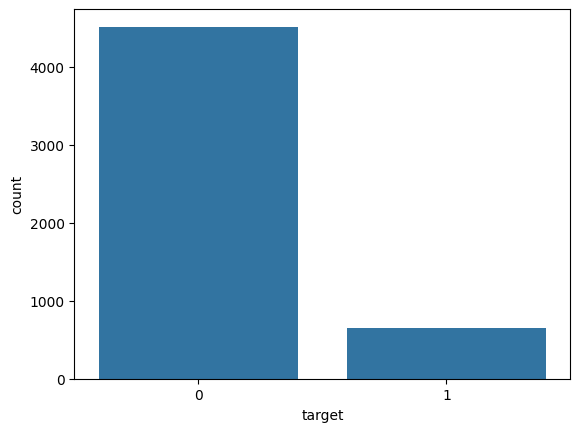

In [ ]:
sns.countplot(data=df,x='target')

In [ ]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

Separate in x and y


In [ ]:
X=df['text'].values
y=df['target'].values

Train and test split


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(4135,)

In [ ]:
X_test.shape

(1034,)

In [ ]:
y_train.shape

(4135,)

In [ ]:
y_test.shape

(1034,)

Preprocessing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer()
x_train=cv.fit_transform(X_train)

In [ ]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4135, 7594))

In [ ]:
len(x_train.toarray())

4135

In [ ]:
len(x_train.toarray()[0])

7594

Train by ML Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()


In [ ]:
nb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
x_test=cv.transform(X_test)

In [ ]:
len(x_test.toarray())

1034

In [ ]:
len(x_test.toarray()[0])

7594

In [ ]:
y_pred=nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Testing Accuracy:")
accuracy_score(y_pred,y_test)

Testing Accuracy:


0.9816247582205029

In [ ]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.9929866989117292

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))



Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.97      0.90      0.93       149

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



Lets test using some emails

In [ ]:
email=['Hey, Jack whats up dude? Tomorrow pls meet with me at my home']

In [ ]:
clean_email=cv.transform(email)

In [ ]:
len(clean_email.toarray()[0])

7594

In [ ]:
check=nb.predict(clean_email)[0]

In [ ]:
print(check)

0


Evaluation Function

In [ ]:
email=['Hey i am Elon Musk. Get a brand new car from Tesla']

clean_email=cv.transform(email)
check=nb.predict(clean_email)[0]

if check ==0:
    print("this is a ham email")

else:
    print("this is a spam email")

this is a ham email
